# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

In [3]:
import random

import numpy as np


## 1. Cross-Validation = linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

Alpha: 0.05, w: [[-130.22804017    1.33115036]]
Alpha: 0.1, w: [[-101.72397081    1.16978757]]
Alpha: 0.4, w: [[-43.97286143   0.84285575]]
Alpha: 0.8, w: [[-25.02664777   0.73559994]]
Alpha: 1.5, w: [[-14.26728975   0.67468987]]
Alpha: 2.0, w: [[-10.91492177   0.65571133]]


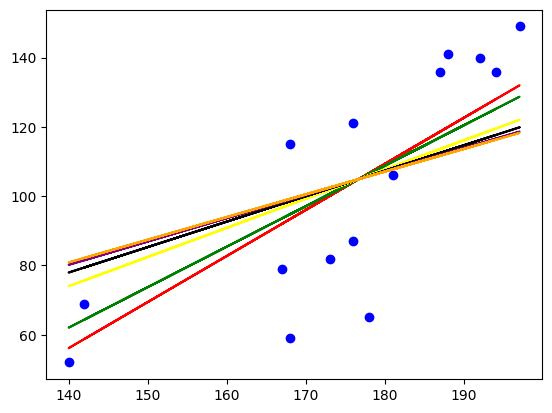

In [35]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [0.05, 0.1, 0.4, 0.8, 1.5, 2.0]
results = {}


for alpha in alphas:
# add 1-3 line of code here
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    w=w.ravel()
    results[alpha] = w

# add 1-3 lines to compare the results
for alpha in results:
    print(f"Alpha: {alpha}, w: {results[alpha]}")

    
import matplotlib.pyplot as plt
x_array = np.array(x[:,1]).flatten()
y_array = np.array(y).flatten()
plt.scatter(x_array, y_array, color='blue', marker='o')

# # draw the lines
plt.plot(x_array, results[0.05][0, 0] + results[0.05][0, 1]*x_array, color='red')
plt.plot(x_array, results[0.1][0, 0] + results[0.1][0, 1]*x_array, color='green')
plt.plot(x_array, results[0.4][0, 0] + results[0.4][0, 1]*x_array, color='yellow')
plt.plot(x_array, results[0.8][0, 0] + results[0.8][0, 1]*x_array, color='black')
plt.plot(x_array, results[1.5][0, 0] + results[1.5][0, 1]*x_array, color='purple')
plt.plot(x_array, results[2.0][0, 0] + results[2.0][0, 1]*x_array, color='orange')

plt.show()


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [ ]:
def sgd(x, y, w, alpha, epochs):
    for epoch in range(epochs):
        for i in range(x.shape[0]):
            random_index = random.randint(0, x.shape[0] - 1)
            xi = x[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(w) - yi)
            w = w - alpha * gradients
    return w
    
    

In [ ]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 
epochs = 10


w0, w1 = random.uniform(-1, 1), random.uniform(-1, 1)


w = np.linalg.inv(x.T*x + alpha * I)*x.T*y # update this line
w=w.ravel()


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df['class'] = iris_data.target

x1 = iris_df['sepal width (cm)'].values
x2 = iris_df['sepal length (cm)'].values 
y = iris_df['class'].values

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x

# print all features
print(iris_data.feature_names)
print(iris_data.target_names)

y_pred = a * x + b

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
